<a href="https://colab.research.google.com/github/Yash1289/CoronaVirus_Tweet_Sentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

**Sentiment Analysis** , also called opinion mining is one such process in which with the help of techniques of natural language processing , text analysis , computational linguistics we try to predict the emotional tone or attitude that a writer or speaker expreses towards any subject . In this age when social media platforms are more important and influential than ever and on them millions of text are generated everyday , the application of sentiment analysis becomes more powerful and broad .

Twitter is one of the most powerful social media platform in the world right now , with 360 million monthly active users and around 500 million tweets sent each day. It is used every day by people to express opinions about different topics, such as products, movies, music, politicians, events, social events, among others. 

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. It is a global pandemic that is still infecting millions of people around the world . For this project we will be looking at thousand of tweets made on Covid-19 from around the world and will try to predict the sentiment of each of the tweet by classifying them into three categories positive, negative and neutral

For this project we are going to use
  1. Numpy :- For its linear algebra functions and the advantage it offers over list in terms of speed and memory consumed
  2. Pandas :- This will be our primary data analysis library necessary for almost all of our data manipulations jobs
  3. Matplotlib :- Basic visualization library that we need for plotting and graphs
  4. Seaborn :- For more customizable and advanced data visualization
  5. Sklearn :- For all the models and tools that we need for our predictive data analysis

In [ ]:
#importing numpy ,pandas and regular expression module

import numpy as np
import pandas as pd
import re

In [ ]:
#Mounting our google drive so we can access the files on it easily from the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the Coronavirus Tweets csv file using pandas 
path = "/content/drive/MyDrive/Coronavirus Tweets.csv"
corona_df = pd.read_csv(path , engine = "python")

### **Now we will perform some basic data exploration such as**


*   Checking the head of the database to gain some general idea about the nature of the database 
*   Finding  out its shape to know how many observations and features are in our dataset
*   We will also call `.columns` , `value_counts` like  methods and functions on both of our datasets so that we can understand all the features better

In [ ]:
corona_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#Checking our the list of features we have in our dataset
corona_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#Checking the frequency of each username in our dataset
corona_df["UserName"].value_counts()

4094     1
25862    1
30052    1
19811    1
17762    1
        ..
31418    1
25273    1
27320    1
4791     1
4098     1
Name: UserName, Length: 41157, dtype: int64

We can notice that all of our tweets in the dataset are from different usernames which basically means all of the tweets are made from different twitter accounts

In [ ]:
#Checking the frequency of each screename in our dataset
corona_df["ScreenName"].value_counts()

67583    1
50418    1
54608    1
77135    1
75086    1
        ..
86687    1
88734    1
82589    1
84636    1
65536    1
Name: ScreenName, Length: 41157, dtype: int64

Although two people can have the same screenname on twitter, in our dataset each of the user has its own different screen name and no two tweets are made from account having similar screen name

In [ ]:
#Calculating the total sum of null values we have for different columns in our dataset
corona_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

We only have null values in location column of our dataset where we have around 8590 null values 

In [ ]:
#Checking the number of tweets we have from each location of the world in our dataset
corona_df["Location"].value_counts()

London                        540
United States                 528
London, England               520
New York, NY                  395
Washington, DC                373
                             ... 
Purdue University, IN, USA      1
Giffnock ???????                1
EU Citizen                      1
Tifton, Ga.                     1
Belize by way of Wakanda        1
Name: Location, Length: 12220, dtype: int64

Most of the tweets are from United States, London and New York 

### We did basic exploration of our dataset , so now we will do some general data cleaning like data type transformation and handling of null values to name a few 

In [ ]:
#Converting the TweetAt column to a datetime object
corona_df["TweetAt"] = pd.to_datetime(corona_df["TweetAt"])

In [ ]:
print(corona_df["TweetAt"].min())
print(corona_df["TweetAt"].max())

2020-01-04 00:00:00
2020-12-04 00:00:00


So all the records or tweets in our database are from the start of 2020 up until almost the mid of december

In [ ]:
#Stripping all the whitespaces from the start and the end of each of the location values
corona_df["Location"] = corona_df["Location"].str.strip()

#Capitalizing the location values
corona_df["Location"] = corona_df["Location"].str.capitalize()

In [ ]:
#Verifying if the location values are capitalized
corona_df[corona_df["Location"] == "london"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [ ]:
def cityFinder(location):

  '''Function to separate location values using -,|,/ as separator'''

  if isinstance(location, str):
    cityAndOthers = re.split(r"-|,|/", location)
    return cityAndOthers[0]
  else:
    return location

The function will help us to extract the cities from the location values as much as possible

In [ ]:
#Applying the function cityFinder on Location Column
corona_df["Location"] = corona_df["Location"].apply(cityFinder)

In [ ]:
corona_df[corona_df["Location"] == "London, England"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [ ]:
def SpamLocationRemover(location):

  '''Function to remove all the special character and number from each of the location values'''

  if isinstance(location, str):
    clearLocation = re.sub("[^a-zA-Z\s]", "" , location)
    return clearLocation
  else:
    return location

In [ ]:
#Applying the function SpamLocationRemover on the location column
corona_df["Location"] = corona_df["Location"].apply(SpamLocationRemover)

In [ ]:
#Stripping the whitespaces from the front and back of each of the location value
corona_df["Location"] = corona_df["Location"].str.strip()

In [ ]:
#Calculating the number of tweets belonging to each sentiment category
corona_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

### **For better analysis and classification we merged our Extremely positive tweets and positive tweets into a single category of positive tweets as well as our Extremely Negative tweets and negative tweets into a single category of just negative tweets so at the end we will classify our models into three categories positive , negative and neutral**

In [ ]:
def Sentiment_Grouping(sentiment):

  '''Function to bring under Extremely Positive tweets into Positive Category
     and Extremely Negative tweets into Negative Category '''

  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [ ]:
#Applying the Sentiment_Grouping Function on Sentiment Column
corona_df["Sentiment"] = corona_df["Sentiment"].apply(Sentiment_Grouping)

In [ ]:
#Rechecking the number of tweets belonging to each sentiment category after applying the Sentiment Grouping functioin
corona_df["Sentiment"].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

### **Feature Engineering**

In [ ]:
#Grouping our dataset on the basis of Location and sentiment to calculate the number of tweets belonging to each sentiment from a particular location 
sentiment_grouping = corona_df.groupby(["Location" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sentiment_pivot = sentiment_grouping.pivot(index = "Location" , columns="Sentiment" , values="OriginalTweet")
sentiment_pivot.head()

Sentiment,Negative,Neutral,Positive
Location,,,
,158.0,87.0,153.0
A,NaN,1.0,1.0
A big gay world of my own,NaN,1.0,NaN
A blasted heath,NaN,1.0,NaN
A box,1.0,1.0,NaN


Our dataframe has null values if tweets belonging to any of the three sentiment is missing from our records for a particular location

In [ ]:
#Filling the null values of sentiment_pivot dataframe with zero 
sentiment_pivot.fillna(0, inplace = True)

#Calculating the percentage of tweets belonging to each sentiment for each of the locations
sentiment_pivot = sentiment_pivot.apply(lambda x: round(x*100/sum(x),2) if sum(x) > 10 else (x)*0, axis=1)
sentiment_pivot.head()

Sentiment,Negative,Neutral,Positive
Location,,,
,39.7,21.86,38.44
A,0.0,0.00,0.00
A big gay world of my own,0.0,0.00,0.00
A blasted heath,0.0,0.00,0.00
A box,0.0,0.00,0.00


In [ ]:
#Creating a new columns SentimentDiff that will help as to categorize the location later on
sentiment_pivot["SentimentDiff"] = sentiment_pivot["Positive"] - sentiment_pivot["Negative"]

In [ ]:
def Location_Cat(sRow) :

  '''Function to categorize the location into 5 categories depeding on the percentage of SentimentDiff and neutral tweets made from that location'''

  if (sRow["Neutral"] >= sRow["Positive"] and sRow["Neutral"] >= sRow["Negative"]) or abs(sRow["SentimentDiff"]) <= 15:
    return 0
  elif sRow["SentimentDiff"] >30 :
    return 2
  elif sRow["SentimentDiff"] >10 :
    return 1
  elif sRow["SentimentDiff"] < -30:
    return -2
  elif sRow["SentimentDiff"] < -10:
    return -1

In [ ]:
sentiment_pivot = sentiment_pivot.reset_index().rename_axis(None, axis=1)

#Creating a new column named LocationCat using the function Location_Cat
sentiment_pivot["LocationCat"] = sentiment_pivot.apply(Location_Cat , axis = 1)

sentiment_pivot.head()

,Location,Negative,Neutral,Positive,SentimentDiff,LocationCat
0,,39.7,21.86,38.44,-1.26,0
1,A,0.0,0.00,0.00,0.00,0
2,A big gay world of my own,0.0,0.00,0.00,0.00,0
3,A blasted heath,0.0,0.00,0.00,0.00,0
4,A box,0.0,0.00,0.00,0.00,0


In [ ]:
#Merging the sentiment_pivot table with our corona_df dataframe and creating a new Dataframe named corona_new_df
corona_new_df = pd.merge(corona_df , sentiment_pivot , how = "left" , on = "Location")

In [ ]:
#Dropping Negative , Positive , Neutral and SentimentDiff columns from our main dataframe
corona_new_df.drop(columns = ["Negative" , "Positive" , "Neutral" , "SentimentDiff"] , axis = 1 , inplace = True)

In [ ]:
#Filling all the NaN location values with Unknown
corona_new_df["Location"].fillna("Unknown" , inplace = True)

#Filling all the NaN LocationCat values with zero
corona_new_df["LocationCat"].fillna(0 , inplace = True)

In [ ]:
#Creating new columns "Month" and "Year" using the information from TweetAt column
corona_new_df["Month"] = corona_new_df["TweetAt"].apply(lambda x : x.month)
corona_new_df["Year"] = corona_new_df["TweetAt"].apply(lambda x : x.year)

In [ ]:
corona_new_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020


## **Text cleanup and pre-processsing**

In this part we will clean and process our text data so that we can use it for model building later on

###**Text Cleaning**

Before we can pass our tweets into text processing and ultimately to machine learning algorithms, it needs some clean-up so that our tweets no longer contains characters that gives no useful information about the sentiment and induce noise into algorithms.


In [ ]:
#Creating a copy of the database
corona_model_df = corona_new_df.copy()

In [ ]:
#Installing contractions library
from textblob import TextBlob, Word
!pip install contractions

     |████████████████████████████████| 321 kB 14.7 MB/s 
     |████████████████████████████████| 284 kB 58.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=6d12b958fe58988d6f7532881993a410572afa7a51050918ff03eb1e560b330c
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
def remove_usernames_links(tweet):

    '''Function to remove hashtags, links and linebreaks'''

    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub(r'\r+|\n+','',tweet)
    return tweet

In [ ]:
#Creating a new columns named CleanedTweet by applying the function remove_username_links on OriginalTweet
corona_model_df["CleanedTweet"] = corona_model_df["OriginalTweet"].apply(remove_usernames_links)

In [ ]:
def extract_hash_tags(s):
  '''Function to extract hashtags from the tweets and pass them as a string'''

  return " ".join(part[1:] for part in s.split() if part.startswith('#'))

In [ ]:
#Creating a new columns named "hashtags" by applying the function extract_hash_tags on CleanedTweet
corona_model_df["hashtags"] = corona_model_df["CleanedTweet"].apply(extract_hash_tags)

In [ ]:
def remove_spam(tweet):

    '''Function to remove Special characters and hashtags from the tweets'''

    tweet = re.sub('[^a-zA-Z0-9\s]+','',tweet)
    tweet = re.sub('#[^\s]+', "", tweet)
    return tweet

In [ ]:
#Applying the function remove_spam on CleanedTweet
corona_model_df["CleanedTweet"] = corona_model_df["CleanedTweet"].apply(remove_spam)

In [ ]:
import contractions

def contractions_remover(text):

  '''Function to expand the shortened words'''

# creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  return expanded_text

In [ ]:
#Applying the function contractions_remover on CleanedTweet column
corona_model_df["CleanedTweet"] = corona_model_df["CleanedTweet"].apply(contractions_remover)

Converting each contraction to its expanded, original form will help us with text standardization.

In [ ]:
corona_model_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year,CleanedTweet,hashtags
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020,and and,
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020,advice Talk to your neighbours family to excha...,
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020,Coronavirus Australia Woolworths to give elder...,
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020,My food stock is not the only one which is emp...,COVID_19 COVID19 coronavirus confinement Confi...
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020,Me ready to go at supermarket during the COVID...,COVID19 coronavirus restezchezvous StayAtHome ...


###**Removing Punctuation and Stopwords**

Stopwords are those commonly used words that are often added to sentences to make them grammatically correct.They do no add any values to our analysis as these words carry less or no meaning as far as churning out information about the sentiment is concerned

In [ ]:
#Importing the nltk and string library
import nltk
import string

#Using the nltk library to download a list of stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_process(msg):

    '''Function to remove punctuation and stopwords from the sentences'''

    #Creating a list of few negations words
    whitelist = ["n't", "not", "no" , "nor" , "couldn't" , "wouldn't" ,"isn't" , "haven't" , "wasn't" , "didn't" , "hasn't" , "shouldn't" , "doesn't" , "weren't" ,
                 "aren't"]
    #Creating a list of all the characters present in the sentence that are not punctuation
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)

    #Creating a list of all the words that are not stopwords or are present in whitelist and then joining them to return a sentence
    return ' '.join([word for word in nopunc.split() if (word.lower() not in stopwords.words('english') or word.lower() in whitelist)])

In [ ]:
#Creating a new column named "tokenized_tweet" by applying function "text_process" on CleanedTweet column
corona_model_df['tokenized_tweet'] = corona_model_df['CleanedTweet'].apply(text_process)

###**Lemmatization**

Lemmatization is a very popular and common text pre processing technique . It will help us to group different inflected form of words into the root form called lemma which will carry the same meaning . It will help us to diminish the number of tokens required to transfer the information and hence boost up the entire method.

In [ ]:
nltk.download('wordnet')

#Importing the necessary libraries that we will need for lemmatization
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def lemmatize_with_postag(sentence):

    '''Function that will lemmatize the words with its part of speech tag'''

    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [ ]:
#Creating a new column named "lemmatized_tweet" by "lemmatize_with_postag" function on tokenized_tweet columns
corona_model_df["lemmatized_tweet"] = corona_model_df["tokenized_tweet"].apply(lemmatize_with_postag)

##**EDA Section**

In [ ]:
#Importing add on libraries 
from PIL import Image
import requests
from google.colab import files

In [ ]:
#Creating a copy of the database which we will use to perform our eda
corona_eda_df = corona_model_df.copy()

In [ ]:
#Importing the seaborn and matplotlib library for our data visualization tasks
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Setting different parameters of matplotlib and seaborn for better visualization 
plt.rcParams['figure.figsize'] = 10,7
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')

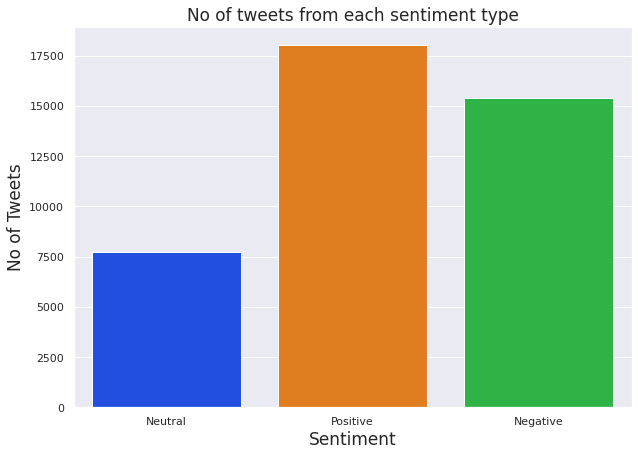

In [ ]:
#Plotting a countplot to show number of tweets belonging to each category in our dataset
sns.countplot(x="Sentiment", data=corona_eda_df, palette = "bright")
plt.xlabel("Sentiment" , fontsize=17)
plt.ylabel("No of Tweets", fontsize = 17)
plt.title("No of tweets from each sentiment type" , fontsize=17)
plt.show()

Most of the tweets in our dataset are of positive sentiment and very few number of tweets are of neutral sentiment

### **Tweets Analysis**

In [ ]:
def show_dist(df, col):

  '''Function to show distribution of any particular column for each of the different sentiment'''

  bins = np.arange(df[col].min(), df[col].max() + 1)
  g = sns.FacetGrid(df, col='Sentiment', height=5, hue='Sentiment', palette="bright")
  g = g.map(sns.histplot, col, kde=False, bins=bins)

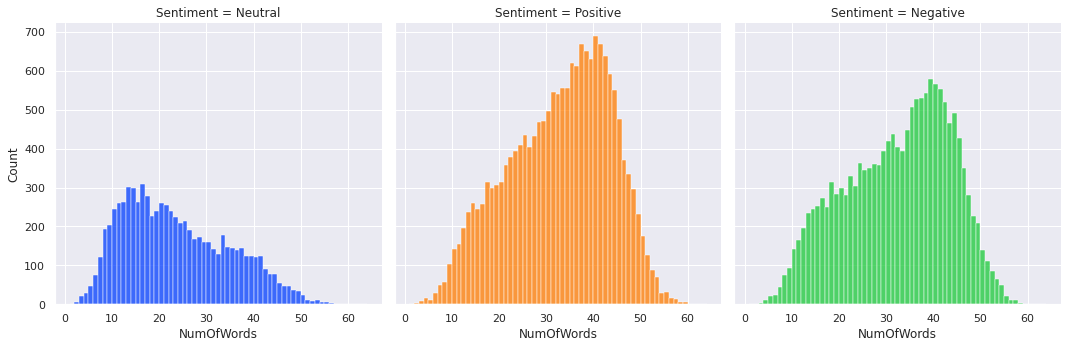

In [ ]:
#Creating a new column named "NumOfWords" to store the number of words in each tweet
corona_eda_df["NumOfWords"] = corona_eda_df["OriginalTweet"].str.split().apply(len)

show_dist(corona_eda_df , "NumOfWords")

Generally number of words present in tweets of neutral sentiment are far less as compared to tweets with a positive or negative sentiment . Most of the positive and negative sentiment tweets contains almost 40 words on average  

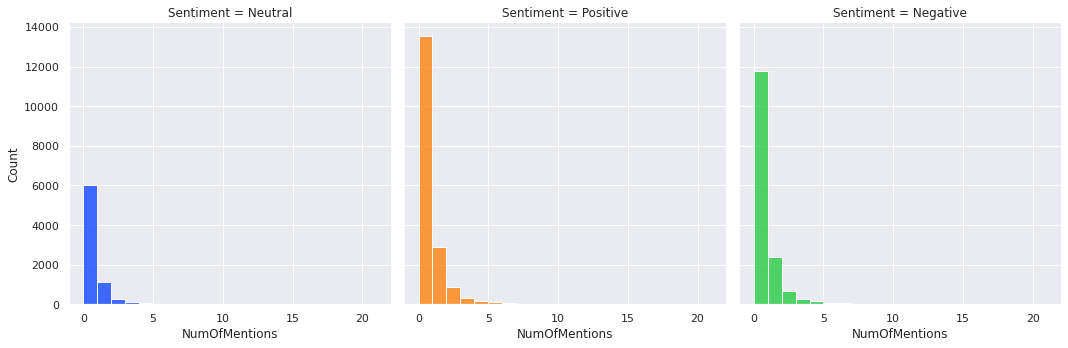

In [ ]:
#Creating a new column named "NumOfMentions" to store the number of mentions in each tweet
corona_eda_df["NumOfMentions"] = corona_eda_df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'@[^\s]+', tweet)))

show_dist(corona_eda_df, "NumOfMentions")

Most of the tweets in our dataset doesn't contains any mentions also there seems to be no difference in number of mentions with regard to the sentiment.

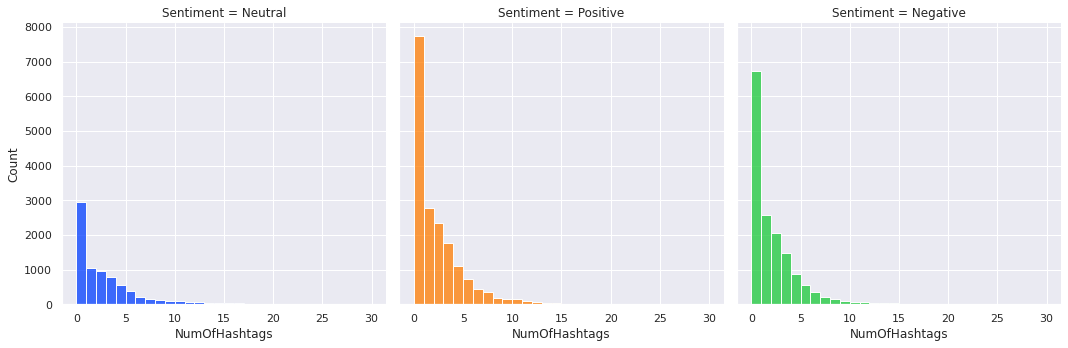

In [ ]:
#Creating a new columns named "NumOfHashtags" to store the number of hastags in each tweet
corona_eda_df["NumOfHashtags"] = corona_eda_df["OriginalTweet"].apply(lambda tweet : len(re.findall(r'#[^\s]+', tweet)))

show_dist(corona_eda_df, "NumOfHashtags")

Most of the tweets doesn't have any hashtags . Again, no difference in number of hash tags with regard to the sentiment.

In [ ]:
def corona_wordcloud(tweetSentiment):

  "Function to show wordcloud for any textual column"

  # storing words from all tweets
  all_words = ' '.join([text for text in neutral_tweets['CleanedTweet'] ])

  #Storing the url of the image that we will use to mask wordcloud
  url = "https://images2.imgbox.com/e0/3c/d7SAy9mI_o.png"

  img = Image.open(requests.get(url, stream=True).raw)

  # converting PIL images into NumPy arrays
  virusMask = np.array(img)

  font_path = "/content/drive/MyDrive/Balivia.ttf"

  from wordcloud import WordCloud
  wordcloud = WordCloud(width=2000, height=1000, max_font_size=200, font_path = font_path,
                            background_color="white", max_words=2000, mask = virusMask, 
                            contour_width=1, contour_color="steelblue", 
                            colormap="nipy_spectral").generate(all_words)

  plt.figure(figsize=(13, 11))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

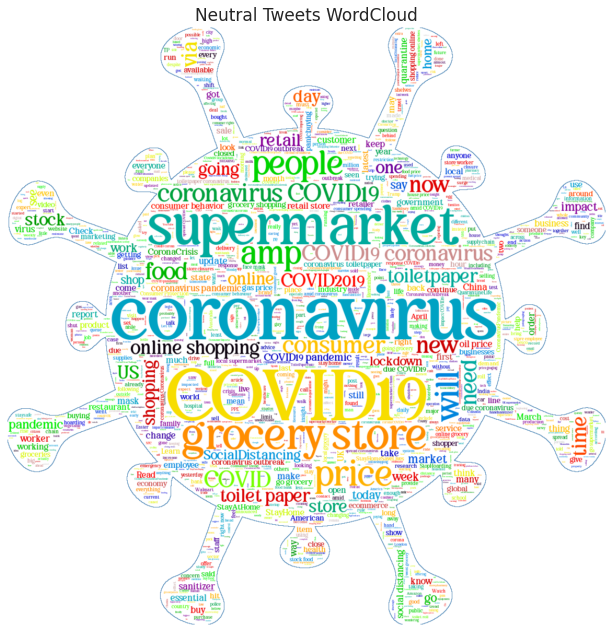

In [ ]:
#Creating a subset of our main dataframe that will contain only neutral tweets
neutral_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Neutral"]

#Calling the function corona_wordcloud
corona_wordcloud(neutral_tweets)
plt.title("Neutral Tweets WordCloud", fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

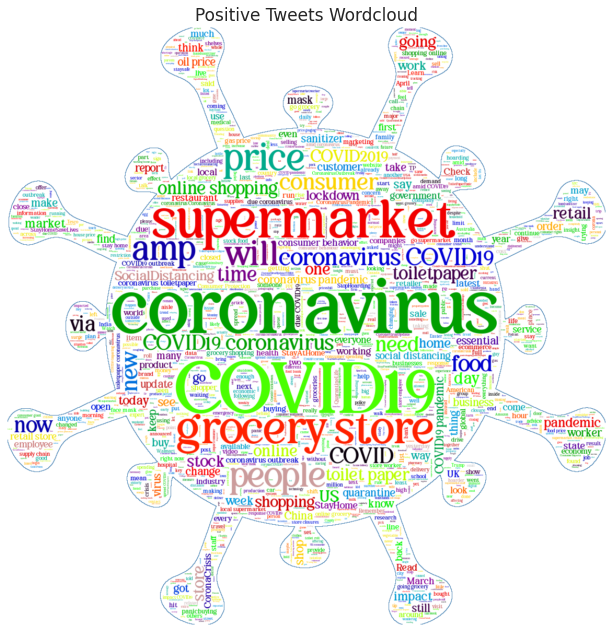

In [ ]:
#Creating a subset of our main dataframe that will contain tweets of only positive sentiment
positive_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Positive"]

#Calling the function corona_wordcloud
corona_wordcloud(positive_tweets)
plt.title("Positive Tweets Wordcloud", fontsize = 17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

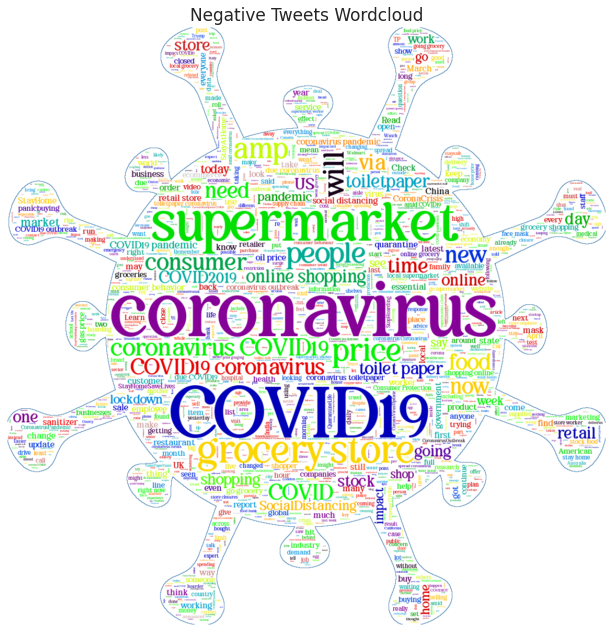

In [ ]:
#Creating a subset of our main dataframe that will contain tweets of only negative sentiment
negative_tweets = corona_eda_df[corona_eda_df["Sentiment"] == "Negative"]

#Calling the function corona_wordcloud
corona_wordcloud(negative_tweets)
plt.title("Negative Tweets Wordcloud", fontsize=17)
plt.show()

In all the tweets be of any sentiment the most frequently used words apart from the name of the pandemic and disease are supermarket, grocery store, online shopping, toilet paper , food and stock which signals how much of an important issue and hard it was for the people to even get basic day to day items during the pandemic

In [ ]:
#Vectorization for Data Visualization
def vectorization(table , col):

    '''Function to calculate the number of each word from a given column of a dataframe'''

    vector = CountVectorizer()

    frequency_matrix = vector.fit_transform(table[col])
    sum_frequencies = np.sum(frequency_matrix, axis=0)

    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names_out()).transpose()
    return frequency_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

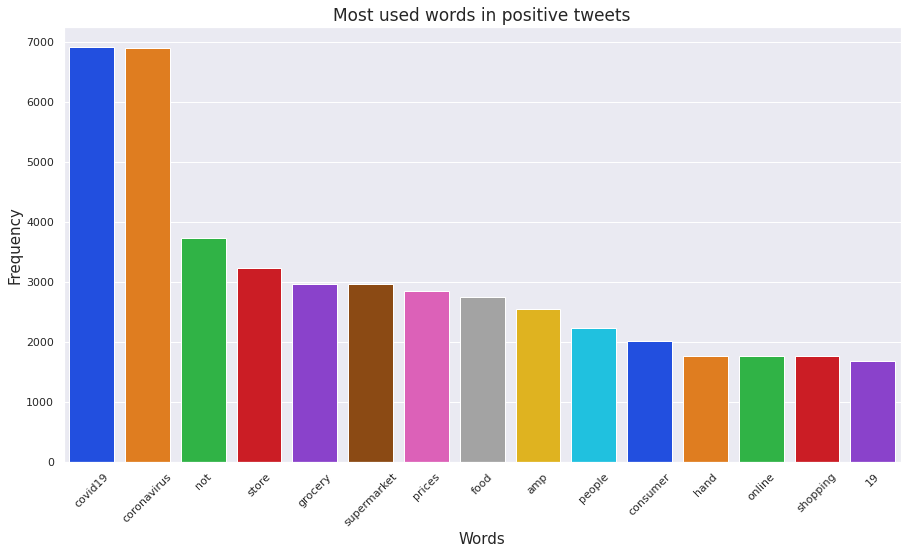

In [ ]:
#Creating a subset of our main dataframe that will contain records of only positive sentiment and passing it into vectorization function
Posfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Positive"] , "tokenized_tweet")
Posfrequency_df.reset_index( inplace = True)

#Renaming the columns of our dataframe
Posfrequency_df.rename(columns = {'index': "Word" , 0 : "Frequency"} , inplace = True)

#Sorting our PosFrequency dataset by Frequency values so that we have the top 15 most frequent words present in tweets of positive sentiment
Poshashtags = Posfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]

sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Word" , y ="Frequency" , data = Poshashtags , palette = "bright")

plt.xticks(rotation=45)
plt.xlabel("Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Most used words in positive tweets", fontsize=17)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

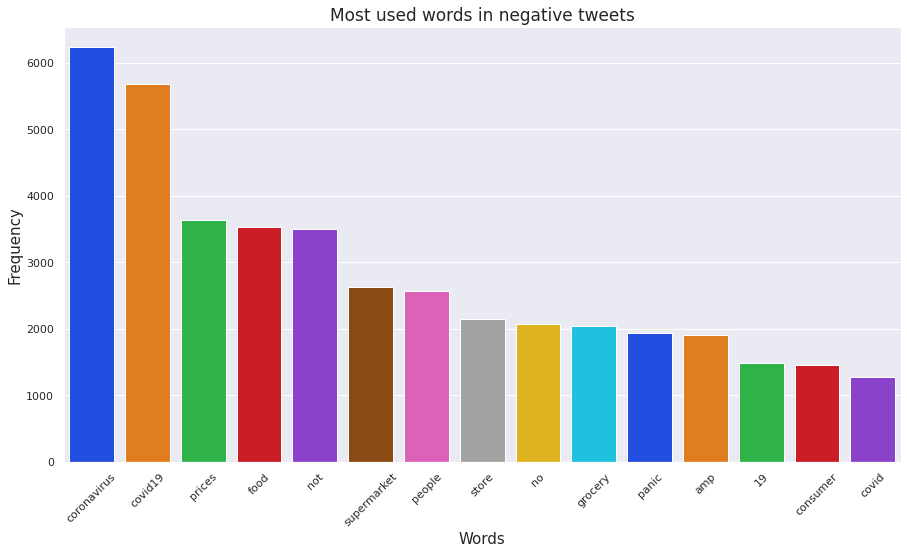

In [ ]:
#Creating a subset of our main dataframe that will contain records of only positive sentiment and passing it into vectorization function
Negfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Negative"], "tokenized_tweet")
Negfrequency_df.reset_index( inplace = True)

#Renaming the columns of our dataframe
Negfrequency_df.rename(columns = {'index': "Word" , 0 : "Frequency"} , inplace = True)

#Sorting our NegFrequency dataset by Frequency values so that we have the top 15 most frequent words present in tweets of negative sentiment
Negfrequency = Negfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Word" , y ="Frequency" , data = Negfrequency , palette = "bright")
plt.xticks(rotation=45)
plt.xlabel("Words", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Most used words in negative tweets", fontsize=17)
plt.show()

Looking at both the barplots we can conclude few points

1. There are relatively more mentions of words like store, grocery in positive tweets as compared to negative tweets 
2. Panic is in list of top 15 words present in negative tweets but it is absent from the list of positive tweets whereas shopping is in list of top 15 words present in positive tweets but it is absent from negative tweets top 15 words list

### **People Sentiment regarding covid as seen in their tweets across different months of the year**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

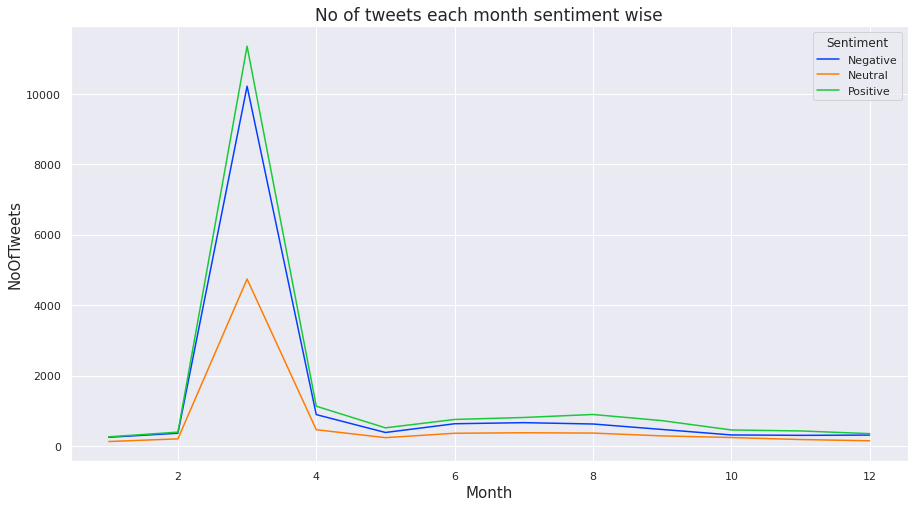

In [ ]:
#Using groupby operation to calculate the number of tweets belonging to each sentiment for a particular month
monthSentiment_groupby = corona_eda_df.groupby(["Month" , "Sentiment"]).agg({ "CleanedTweet" : "count"}).reset_index()

#With the help of lineplot visualizing the trends across different months in number of tweets present from each sentiment
sns.lineplot(x = "Month" , y ="CleanedTweet" , hue="Sentiment" ,  data = monthSentiment_groupby , palette = 'bright' )

plt.xlabel("Month", fontsize=15)
plt.ylabel("NoOfTweets", fontsize=15)
plt.title("No of tweets each month sentiment wise", fontsize=17)
plt.show()

Most of the tweets in our records are from the month of March, for all other months the number of tweets are almost constant

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

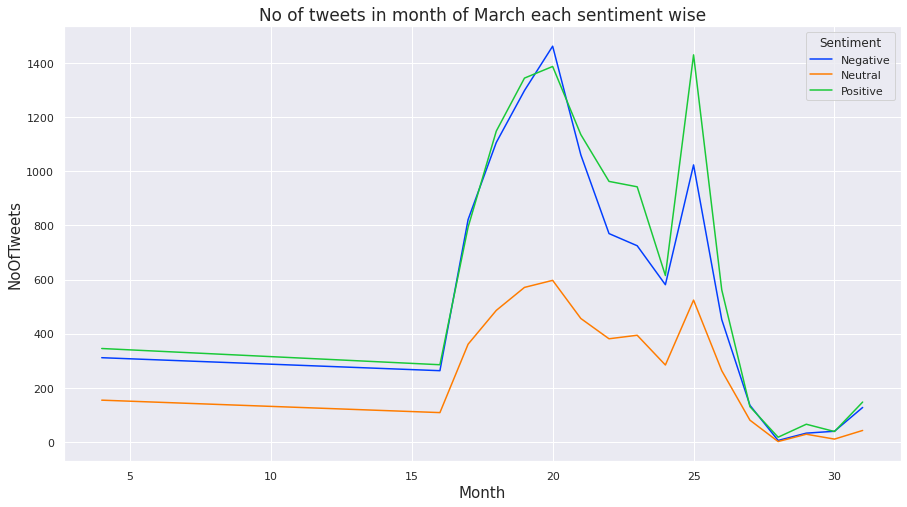

In [ ]:
#Creating a subset of our dataframe that will only contains tweets from the month of march
corona_3rd_subset = corona_eda_df[corona_eda_df["Month"] == 3].copy()

#Creating a new column "Day" that will store the day on which the tweet is made
corona_3rd_subset["Day"] = corona_3rd_subset["TweetAt"].apply(lambda x : x.day)

#Grouping our dataset on the basis of Day and sentiment to get the number of tweets tweeted on each day in the month of march belonging to each sentiment
daySentiment_groupby = corona_3rd_subset.groupby(["Day" , "Sentiment"]).agg({ "CleanedTweet" : "count"}).reset_index()
sns.lineplot(x = "Day" , y ="CleanedTweet" , hue="Sentiment" ,  data = daySentiment_groupby , palette = 'bright' )

plt.xlabel("Month", fontsize=15)
plt.ylabel("NoOfTweets", fontsize=15)
plt.title("No of tweets in month of March each sentiment wise", fontsize=17)
plt.show()

The lineplot signals that most of the tweets in the month of march are from between mid of march up until the start of last week ,in between this period of 10 days we can notice on an average around 1500-2000 tweets posted per day

### **Relation between Tweets sentiment and the location from where it is tweeted**

In [ ]:
#Grouping our dataset on the basis of location to get the number of tweets present in our dataframe from each location
sentiment_grouping22 = corona_df.groupby(["Location"] , sort = False ).agg({ "OriginalTweet" : "count"}).reset_index()

#Sorting our grouped dataset to get the top 5 location with the most number of tweets
sorted = sentiment_grouping22.sort_values(by="OriginalTweet" , ascending = False)[0:5]

#Creating a list of top 5 location names
top_location = sorted["Location"].tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

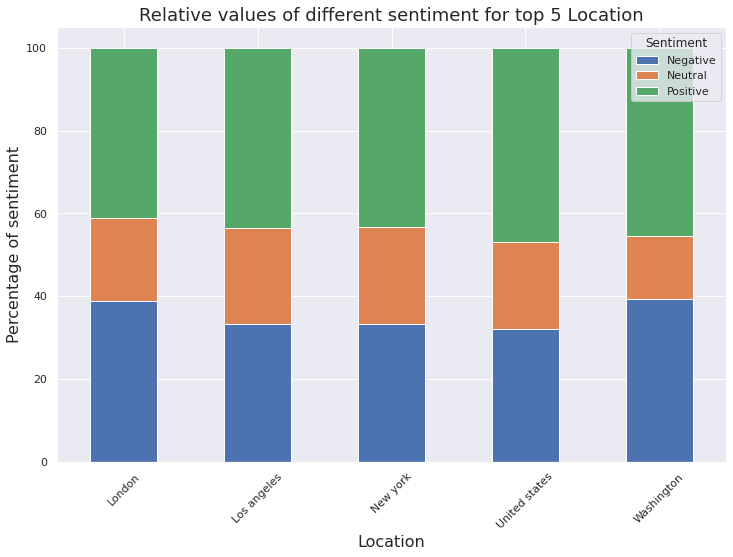

In [ ]:
#Creating a pivot table that will contain the count of tweets belonging to each sentiment from a particular location in our dataset
sentiment_grouping = corona_df[corona_df["Location"].isin(top_location)].groupby(["Location" , "Sentiment"] , sort= False).agg({ "OriginalTweet" : "count"}).reset_index().sort_values(by = "OriginalTweet" , ascending = False)
sentiment_pivot = sentiment_grouping.pivot(index = "Location" , columns="Sentiment" , values="OriginalTweet")


#Changing the int values of sentiment to percent
top5_location_groupby_pivot = sentiment_pivot.apply(lambda x: x*100/sum(x) , axis=1)

#Plotting a bar chart to show the relative values of positive, negative and neutral tweets for the top 5 locations in our dataset
top5_location_groupby_pivot.plot(kind="bar" ,stacked=True , figsize=(12,8))
plt.xlabel("Location" , fontsize = 16)
plt.ylabel("Percentage of sentiment" , fontsize =16)
plt.title("Relative values of different sentiment for top 5 Location" , fontsize =18)
plt.xticks(rotation=45)
plt.show()

From the top 5 locations ,tweets from united states are generally less negative and they also have the highest percentage of positive tweets . For london the percentage of positive and negative tweets is almost 40-40 and if compared to all other 4 locations tweets from london are slightly less positive

### **Relation of hashtags with tweets sentiment**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#Vectorization for Data Visualization
def vectorization(table , col):

    '''Function to calculate the number of each word from a given column of a dataframe'''

    vector = CountVectorizer()

    frequency_matrix = vector.fit_transform(table[col])
    sum_frequencies = np.sum(frequency_matrix, axis=0)

    frequency = np.squeeze(np.asarray(sum_frequencies))
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names_out()).transpose()
    return frequency_df

In [ ]:
#Passing our dataframe into vectorization function so that we can have a dataframe with the frequency of each hashtag
frequency_df = vectorization(corona_eda_df,"hashtags")
frequency_df.reset_index( inplace = True)

#Renaming the columns of frequency_df
frequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)


In [ ]:
#Creating a pie plot to show the top 10 hashtag and their relative percentage share among themselves
hashtags = frequency_df.sort_values(by = "Frequency" , ascending = False )[:10]
import plotly.graph_objects as go

data = {
   "values": hashtags['Frequency'],
   "labels": hashtags["Hashtag"],
   "domain": {"column": 0},
   "name": "hashtags",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Relative Percentage of top 10 Hashtag</b>", legend=dict(x=0.9, y=0.8, orientation="v"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

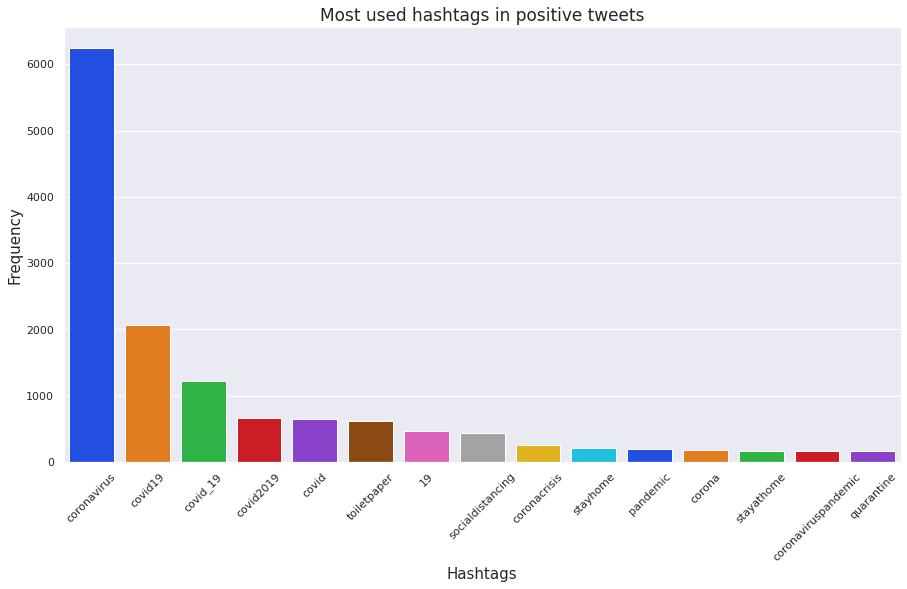

In [ ]:
#Creating a subset of our main dataframe that will contain records of only positive sentiment and passing it into vectorization function
Posfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Positive"],"hashtags")
Posfrequency_df.reset_index( inplace = True)

#Renaming the columns of PosFrequency_df
Posfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

#Sorting our dataset PosFrequency_df by frequency values so that we have the top 15 most frequently used hashtags among the tweets of positive sentiment
Poshashtags = Posfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Poshashtags , palette = "bright")

plt.xlabel("Hashtags", fontsize=15)
plt.ylabel("Frequency", fontsize =15)
plt.title("Most used hashtags in positive tweets",fontsize=17)
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

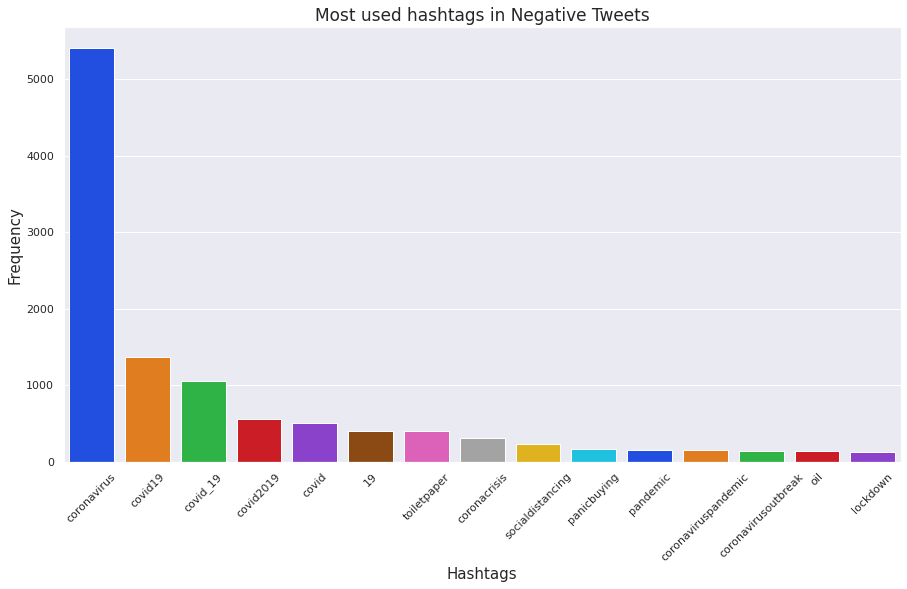

In [ ]:
#Creating a subset of our main dataframe that will contain records of only negative sentiment and passing it into vectorization function
Negfrequency_df = vectorization(corona_eda_df[corona_eda_df["Sentiment"] == "Negative"],"hashtags")
Negfrequency_df.reset_index( inplace = True)

#Renaming the columns of NegFrequency df
Negfrequency_df.rename(columns = {'index': "Hashtag" , 0 : "Frequency"} , inplace = True)

##Sorting our dataset PosFrequency_df by frequency values so that we have the top 15 most frequently used hashtags among the tweets of negative sentiment
Neghashtags = Negfrequency_df.sort_values(by = "Frequency" , ascending = False )[:15]
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x="Hashtag" , y ="Frequency" , data = Neghashtags , palette = "bright")

plt.xlabel("Hashtags", fontsize=15)
plt.ylabel("Frequency", fontsize =15)
plt.title("Most used hashtags in Negative Tweets", fontsize = 17)
plt.xticks(rotation=45)
plt.savefig("MostUsedHashtagNeg.png", bbox_inches = "tight")
files.download("MostUsedHashtagNeg.png")
plt.show()

By looking at both the bar graphs for positive and negative sentiment we can conclude that the hastag like #stayhome,#quarantine is much more used in tweets of positive sentiment as compared to the negative sentiment tweets on the other hand hashtags like #panicbuying or #lockdown is more frequently used in negative sentiment tweets

##**Multinomial Classification**

In this section we will finally apply our model on processed text data and all the other features we have

In [ ]:
from google.colab import files

In [ ]:
#Importing all the necessary libraries and methods that we will need for model building and evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score , accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay , PrecisionRecallDisplay

from collections import defaultdict

In [ ]:
#Creating a copy of our dataframe that we will use for all our multinomial classification operation
corona_multi_df = corona_model_df.copy()

In [ ]:
def Improved_cf(cf_matrix): 

  '''Function to better visualize confusion matrix with the help of seaborn library'''

  group_names = [ "True Neg","False Neutral" ,"False Pos","False Neg","True Neutral" ,"False Pos","False Neg" ,"False Neutral","True Pos" ]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(3,3)

  ax = sns.heatmap(cf_matrix , annot=labels, 
              fmt='', cmap='Blues')
  
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['-1','0',"1"])
  ax.yaxis.set_ticklabels(['-1','0',"1"])

In [ ]:
def classification_results(Y_true, Y_pred , scoring_list , average = None  ):

  '''Function to evaluate our model after training using different types
  of classification evaluation metrics and show all in a dataframe '''
  evaluation_dict = defaultdict(list)

  for count, scoring_metric in enumerate(scoring_list):
    evaluation_dict["scoring"].append(scoring_metric.__name__)
    if count == 0 or average is None:
      metric_value = scoring_metric((Y_true), (Y_pred))
    else:
      metric_value = scoring_metric((Y_true), (Y_pred) , average = average )
    evaluation_dict["Value"].append('{:f}'.format(metric_value))

  evaluation_df = pd.DataFrame(evaluation_dict)
  return evaluation_df

In [ ]:
def evaluate_all_models(evaluation_dfs, model_names):

  '''Function to create a dataframe containing the scores of different evaluation metrics
    for different models'''

  #Creating an empty list in which to store the transposed evaluation dfs
  transposed_evaluation_df = []

  #Transposing all the evaluation df that we have created till now and saving all of them in transposed_evaluation_df
  for e_df in evaluation_dfs:
    e_df = e_df.set_index("scoring")
    e_df.index.names = [None]
    e_df = e_df.transpose()
    transposed_evaluation_df.append(e_df)

  #Concatenating all the individual transposed evaluation df into single df 
  all_model_evaluation_df = pd.concat(transposed_evaluation_df , axis = 0)
  all_model_evaluation_df.insert(0 , "Model_Name" , model_names)
  all_model_evaluation_df.reset_index( drop = True , inplace = True)
  return all_model_evaluation_df
  

In [ ]:
#label encoding our sentiment column values
encoders_nums = {"Sentiment":{"Positive":1,
                              "Neutral":0,
                              "Negative":-1,
                              }}        
corona_multi_df = corona_multi_df.replace(encoders_nums)

In [ ]:
#Checking the different attributes we have
corona_multi_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'LocationCat', 'Month', 'Year', 'CleanedTweet', 'hashtags',
       'tokenized_tweet', 'lemmatized_tweet'],
      dtype='object')

In [ ]:
#Dropping all irrelevant columns that we don't need for model building
corona_multi_df = corona_multi_df.drop(columns = ["UserName" , "ScreenName" , "Location" , "TweetAt" , "OriginalTweet" , "CleanedTweet" , "tokenized_tweet", "Year"] , axis = 1 )
corona_multi_df.columns

Index(['Sentiment', 'LocationCat', 'Month', 'hashtags', 'lemmatized_tweet'], dtype='object')

In [ ]:
#changing case of lemmatized_tweet and hashtags columns to lower so that all our textual data is in a consistent form
corona_multi_df["lemmatized_tweet"] = corona_multi_df["lemmatized_tweet"].str.lower()
corona_multi_df["hashtags"] = corona_multi_df["hashtags"].str.lower()

In [ ]:
#Creating a list of all the attributes that we will need for training models
training_columns = list(set(corona_multi_df.columns) - {"Sentiment"})
training_columns

['LocationCat', 'lemmatized_tweet', 'Month', 'hashtags']

In [ ]:
X = corona_multi_df[training_columns]
Y = corona_multi_df["Sentiment"]

In [ ]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

#Creating a list of the evaluation metrics
scoring_list = [accuracy_score , precision_score, recall_score , f1_score]

We will be using Count vectorizer library from sklearn to convert our collection tweets into matrix to token counts and so changing it into a numerical form that can fed to machine learning alogrithms

In [ ]:
#Initializing our CountVectorizer function
vectorizer1 = CountVectorizer( )
vectorizer2 = CountVectorizer( )

In [ ]:
#We are using column transformer so that we can transform different data columns separately 
column_transformer = ColumnTransformer(
      [('vec1', vectorizer1, 'lemmatized_tweet'), 
    ('vec2', vectorizer2, 'hashtags')],
    remainder='passthrough')

**We will perform hyper parameter tuning for our 2 best performing models**

### **Naive Bayes**

In [ ]:
#Importing MultinomialNB from scikit-learn
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Creating a list of columns that we will use to train our naive bayes model
training_columns_naive = list(set(training_columns) - {"LocationCat"})

In [ ]:
X_naive = corona_multi_df[training_columns_naive]
Y_naive = corona_multi_df["Sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variable and the independent variables
X_train, X_test, y_train, y_test = train_test_split(X_naive , Y_naive, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of MultinomialNB
naive_model = MultinomialNB( )

#Using pipeline to chain multiple estimators into one final estimator
naive_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', naive_model)
                ])

#Fitting our estimator with data
naive_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', MultinomialNB())])

In [ ]:
naive_pipe.score(X_train ,y_train)

0.8039787395596052

In [ ]:
#Making prediction on our test and training dataset
naive_train_preds = naive_pipe.predict(X_train)
naive_test_preds = naive_pipe.predict(X_test)

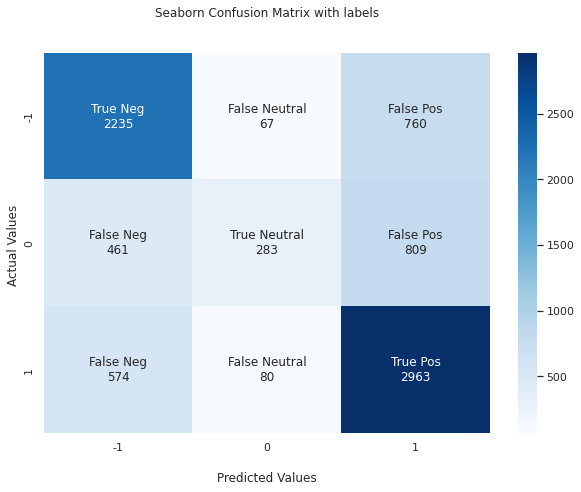

In [ ]:
#Plotting a confusion matrix using the true and predicted values on test dataset
cf_matrix_naive = confusion_matrix(y_test, naive_test_preds)
Improved_cf(cf_matrix_naive)

We can notice a very high number of False Positive and False Negative when it came to classifying the neutral tweets

In [ ]:
#Printing the classification report
print(classification_report(y_train,naive_train_preds))
print(classification_report(y_test,naive_test_preds))

              precision    recall  f1-score   support

          -1       0.82      0.87      0.84     12336
           0       0.87      0.45      0.59      6160
           1       0.78      0.90      0.84     14429

    accuracy                           0.80     32925
   macro avg       0.82      0.74      0.76     32925
weighted avg       0.81      0.80      0.79     32925

              precision    recall  f1-score   support

          -1       0.68      0.73      0.71      3062
           0       0.66      0.18      0.29      1553
           1       0.65      0.82      0.73      3617

    accuracy                           0.67      8232
   macro avg       0.67      0.58      0.57      8232
weighted avg       0.67      0.67      0.64      8232



In the classification report we can notice that the recall value for neutral labels are very very low which means the model is performing bad when it came to correctly classifying neutral labels as it is wrongly classifying them into positives and negative sentiment tweets

In [ ]:
#Calculating the accuracy of our prediction on test data
naive_evaluation_df = classification_results(y_test,naive_test_preds, scoring_list , "macro" )
naive_evaluation_df

,scoring,Value
0,accuracy_score,0.665816
1,precision_score,0.665140
2,recall_score,0.577110
3,f1_score,0.572857


In [ ]:
X_test.shape

(8232, 4)

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variables and the independent variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 ,random_state=42)

In [ ]:
#Initializing our Logistic Regression model function and using "newton-cg" as solver
log_model = LogisticRegression(solver= "newton-cg")

#Using pipeline to chain multiple estimators into one final estimator
log_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', log_model)
                ])

#Fitting our final estimator on the data
log_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LogisticRegression(solver='newton-cg'))])

In [ ]:
log_pipe.score(X_train ,y_train)

0.9735155656795748

In [ ]:
#Predicting values of dependent variable on our training and test dataset
log_train_preds = log_pipe.predict(X_train)
log_test_preds = log_pipe.predict(X_test)

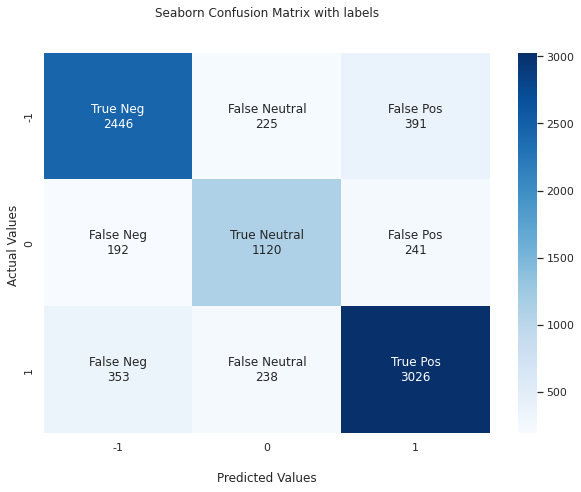

In [ ]:
#Plotting a confusion matrix using the true values and predicted values for our test dataset
cf_matrix_log = confusion_matrix(y_test, log_test_preds)
Improved_cf(cf_matrix_log)

In [ ]:
#Printing classification report for both our test and training datasets
print(classification_report(y_train,log_train_preds))
print(classification_report(y_test,log_test_preds))

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98     12336
           0       0.98      0.95      0.96      6160
           1       0.97      0.98      0.98     14429

    accuracy                           0.97     32925
   macro avg       0.97      0.97      0.97     32925
weighted avg       0.97      0.97      0.97     32925

              precision    recall  f1-score   support

          -1       0.82      0.80      0.81      3062
           0       0.71      0.72      0.71      1553
           1       0.83      0.84      0.83      3617

    accuracy                           0.80      8232
   macro avg       0.78      0.79      0.78      8232
weighted avg       0.80      0.80      0.80      8232



As compared to positive and negative labels the scores for neutral labels are comparatively on the lower side

In [ ]:
#Calculating the accuracy of our model from the predictions made on test dataset
log_evaluation_df = classification_results(y_test,log_test_preds, scoring_list , "macro" )
log_evaluation_df

,scoring,Value
0,accuracy_score,0.800777
1,precision_score,0.784177
2,recall_score,0.785538
3,f1_score,0.784790


###**Stochastic Gradient Descent**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variables and the independent variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of SGDClassifier with default set of hyperparameters
sgdc_model = SGDClassifier()

#Using pipeline to chain multiple estimators
sgdc_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('classifier', sgdc_model)
                ])

#Fitting data on our final estimator
sgdc_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', SGDClassifier())])

In [ ]:
sgdc_pipe.score(X_train ,y_train)

0.9535307517084283

In [ ]:
#Predicting values of dependent variable for our training and test dataset
sgdc_train_preds = sgdc_pipe.predict(X_train)
sgdc_test_preds = sgdc_pipe.predict(X_test)

In [ ]:
#Printing classification report for both our test and training datasets
print(classification_report(y_train,sgdc_train_preds))
print(classification_report(y_test,sgdc_test_preds))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95     12336
           0       0.96      0.91      0.94      6160
           1       0.96      0.96      0.96     14429

    accuracy                           0.95     32925
   macro avg       0.95      0.95      0.95     32925
weighted avg       0.95      0.95      0.95     32925

              precision    recall  f1-score   support

          -1       0.80      0.83      0.82      3062
           0       0.73      0.73      0.73      1553
           1       0.85      0.83      0.84      3617

    accuracy                           0.81      8232
   macro avg       0.80      0.80      0.80      8232
weighted avg       0.81      0.81      0.81      8232



In [ ]:
#Calculating the accuracy of our model on the basis of predictions made on test dataset
accuracy_score(y_test,sgdc_test_preds )

0.8114674441205053

**Tuning the hyperparametes for better accuracy**

In [ ]:
#Creating an instance of SGDClassifier
sgdc_grid_model = SGDClassifier( )

#Using pipeline to chain our multiple estimators
sgdc_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', sgdc_grid_model)
                ])

In [ ]:
# HYperparameter Grid
param_dict = {'clf__alpha': [0.00001, 0.0001,0.01],
              "classifier__max_iter" : [1000,1100,1250],
              "vec__ngram_range" : [(1,1),(1,2)],
              "vec__vec1__max_features" : [3800,4500]
              }

kfold = StratifiedKFold(n_splits=2)


#Using GridSearchCv to find the best set of hyperparameters for our final estimator
sgdc_grid_model = GridSearchCV(sgdc_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

sgdc_grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vec',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vec1',
                                                                         CountVectorizer(),
                                                                         'lemmatized_tweet'),
                                                                        ('vec2',
                                                                         CountVectorizer(),
                                                                         'hashtags')])),
                                       ('clf', SGDClassifier())]),
             param_grid={'clf__alpha': [1e-05, 0.0001, 0.01],
                         'clf__max_iter': [1000, 1100, 1250],
                         'vec__vec1__max_features': [3800, 4500],
     

In [ ]:
#Checking the best set of hyperparameters for our estimators
sgdc_grid_model.best_params_

{'clf__alpha': 0.0001,
 'clf__max_iter': 1250,
 'vec__vec1__max_features': 4500,
 'vec__vec1__ngram_range': (1, 1)}

In [ ]:
sgdc_grid_model.score(X_train ,y_train)

0.9012604403948368

In [ ]:
#Predicting the values of our dependent variable for both training and test dataset
sgdc_train_grid_preds = sgdc_grid_model.predict(X_train)
sgdc_test_grid_preds = sgdc_grid_model.predict(X_test)

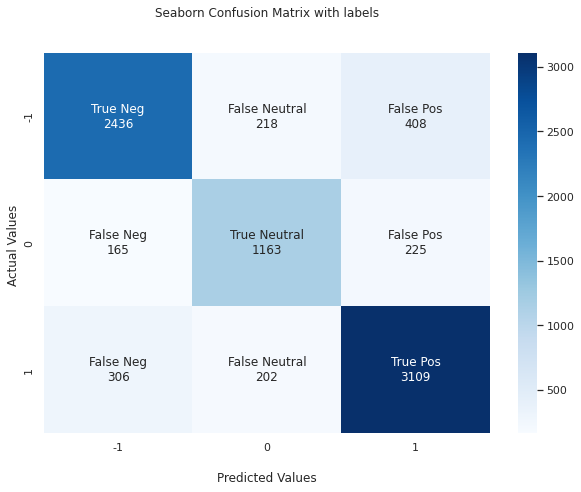

In [ ]:
#Plotting a confusion matrix using the true values and predicted values of our test dataset
cf_matrix_sgdc_grid = confusion_matrix(y_test, sgdc_test_grid_preds)
Improved_cf(cf_matrix_sgdc_grid)

In [ ]:
#Printing a classification report for the predicted values of both our training and test dataset
print(classification_report(y_train,sgdc_train_grid_preds))
print(classification_report(y_test,sgdc_test_grid_preds))

              precision    recall  f1-score   support

          -1       0.92      0.89      0.90     12336
           0       0.86      0.86      0.86      6160
           1       0.91      0.92      0.91     14429

    accuracy                           0.90     32925
   macro avg       0.89      0.89      0.89     32925
weighted avg       0.90      0.90      0.90     32925

              precision    recall  f1-score   support

          -1       0.84      0.80      0.82      3062
           0       0.73      0.75      0.74      1553
           1       0.83      0.86      0.84      3617

    accuracy                           0.81      8232
   macro avg       0.80      0.80      0.80      8232
weighted avg       0.82      0.81      0.81      8232



In [ ]:
sgdc_evaluation_df = classification_results(y_test,sgdc_test_grid_preds, scoring_list , "macro" )
sgdc_evaluation_df

,scoring,Value
0,accuracy_score,0.814869
1,precision_score,0.801166
2,recall_score,0.801328
3,f1_score,0.800959


With the help of hyper parameter tuning we slightly increased the accuracy of our model

###**Support Vector Classification**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variables and the independent variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=42)

In [ ]:
#Creating an instance of LinearSVC 
svc_model = LinearSVC(penalty="l1",dual=False)

#Using a pipeline to chain our multiple estimators into a final one
svc_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svc_model)
                ])
#Fitting our final estimator with data
svc_pipe.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LinearSVC(dual=False, penalty='l1'))])

In [ ]:
svc_pipe.score(X_train ,y_train)

0.9890356871678057

In [ ]:
#predicting values of dependent variable "sentiment" for both our test and training dataset
svc_train_preds = svc_pipe.predict(X_train)
svc_test_preds = svc_pipe.predict(X_test)

In [ ]:
#Printing a classification report using the true values and predicted values on both our training and test dataset
print(classification_report(y_train,svc_train_preds))
print(classification_report(y_test,svc_test_preds))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99     12336
           0       0.99      0.98      0.98      6160
           1       0.99      0.99      0.99     14429

    accuracy                           0.99     32925
   macro avg       0.99      0.99      0.99     32925
weighted avg       0.99      0.99      0.99     32925

              precision    recall  f1-score   support

          -1       0.83      0.81      0.82      3062
           0       0.74      0.75      0.74      1553
           1       0.84      0.85      0.85      3617

    accuracy                           0.82      8232
   macro avg       0.80      0.80      0.80      8232
weighted avg       0.82      0.82      0.82      8232



In [ ]:
accuracy_score(y_test ,svc_test_preds )

0.8170553935860059

**Tuning the hyperparameters of our Support Vector Machine model for better accuracy**

In [ ]:
#Creating an instance of LinearSVC
svc_grid_model = LinearSVC()

#Using pipeline to chain our multiple estimators
svc_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svc_grid_model)
                ])

In [ ]:
# Hyperparameter Grid
param_dict = {
    "clf__dual" : [False],
    "clf__penalty" :  ["l1"],
    "clf__C" : [0.4,0.55,0.75,1]
}

kfold = StratifiedKFold(n_splits=2)


#Using GridSearchCv to find the best set of hyperparameters for our final estimator
svc_grid_model = GridSearchCV(svc_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

svc_grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vec',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vec1',
                                                                         CountVectorizer(),
                                                                         'lemmatized_tweet'),
                                                                        ('vec2',
                                                                         CountVectorizer(),
                                                                         'hashtags')])),
                                       ('clf', LinearSVC())]),
             param_grid={'clf__C': [0.4, 0.55, 0.75, 1], 'clf__dual': [False],
                         'clf__penalty': ['l1']},
             return_train_score=True, verbose=1)

In [ ]:
#Checking the best combination of hyperparameters 
svc_grid_model.best_params_

{'clf__C': 0.4, 'clf__dual': False, 'clf__penalty': 'l1'}

In [ ]:
svc_grid_model.score(X_train ,y_train)

0.9361579347000759

In [ ]:
#Predicting the values of dependent variable for both our training and test dataset
svc_train_grid_preds = svc_grid_model.predict(X_train)
svc_test_grid_preds = svc_grid_model.predict(X_test)

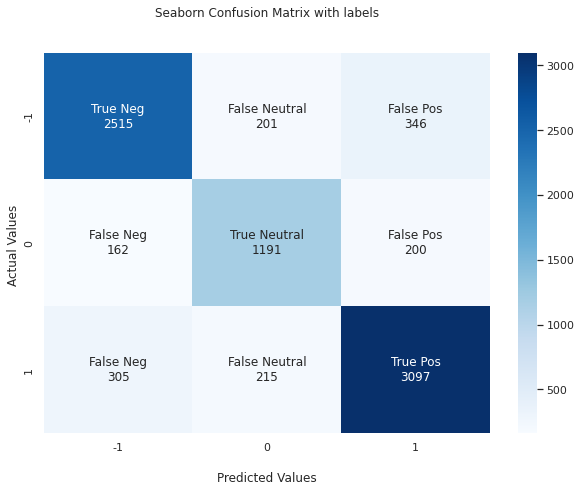

In [ ]:
#Plotting a confusion matrix based on the values predicted for the test dataset
cf_matrix_svc_grid = confusion_matrix(y_test, svc_test_grid_preds)
Improved_cf(cf_matrix_svc_grid)

In [ ]:
#Printing a classification report using the predicted values for both the training and test dataset
print(classification_report(y_train,svc_train_grid_preds))
print(classification_report(y_test,svc_test_grid_preds))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94     12336
           0       0.92      0.90      0.91      6160
           1       0.94      0.95      0.95     14429

    accuracy                           0.94     32925
   macro avg       0.93      0.93      0.93     32925
weighted avg       0.94      0.94      0.94     32925

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83      3062
           0       0.74      0.77      0.75      1553
           1       0.85      0.86      0.85      3617

    accuracy                           0.83      8232
   macro avg       0.81      0.81      0.81      8232
weighted avg       0.83      0.83      0.83      8232



Of all the models evaluated till now svc did the best job when it came to classifying the neutral tweets correctly

In [ ]:
svc_evaluation_df = classification_results(y_test,svc_test_grid_preds, scoring_list , "macro" )
svc_evaluation_df

,scoring,Value
0,accuracy_score,0.826409
1,precision_score,0.811550
2,recall_score,0.814832
3,f1_score,0.813065


As we can notice with the help of GridSearchCV we increased our overall model performance

### **Feature Importance plot for SVM model**

In [ ]:
feature_names = svc_grid_model.best_estimator_.named_steps["vec"].get_feature_names_out()
coefs = svc_grid_model.best_estimator_.named_steps["clf"].coef_.flatten()

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
df["value"] = df.apply(lambda x : -x["value"] if x["feature"].count("vec1__") >0 else x["value"] , axis = 1)
df["feature"] = df["feature"].apply(lambda x : re.sub('vec1__|vec2__','',x))
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

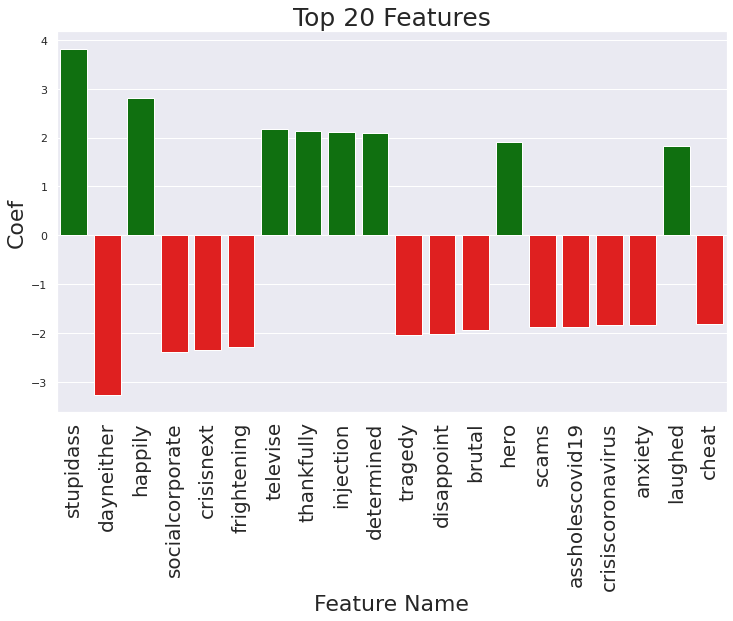

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

We can notice that positive and negative unigrams are almost equally impactfull . Words like cheat, fraud and scams are coming pretty handy in classifying a tweet as negative whereas words like thankfully, happily are more influential for classyfying positive and neutral tweets

###**Comparing all the multinomial models evaluated till now**

In [ ]:
#Creating a list of all the evaluation df created till now for different models
evaluation_df = [ naive_evaluation_df , log_evaluation_df , sgdc_evaluation_df , svc_evaluation_df ]

#Creating a list of all the model names that we have evaluated till now
model_names = ["Naive Bayes" , "Logistic Regression" ,  "Stochastic Gradient Descent" , "Support Vector Machine"]

multinomial_evaluation_df = evaluate_all_models(evaluation_df , model_names)
multinomial_evaluation_df

,Model_Name,accuracy_score,precision_score,recall_score,f1_score
0,Naive Bayes,0.665816,0.665140,0.577110,0.572857
1,Logistic Regression,0.800777,0.784177,0.785538,0.784790
2,Stochastic Gradient Descent,0.814869,0.801166,0.801328,0.800959
3,Support Vector Machine,0.826409,0.811550,0.814832,0.813065



As we can see SVM is performing best for us in terms of all evaluation metrics , while the scores of naive bayes are very ordinary overall 

##**Binary Classification**

In this part we will only focus on classifying tweets into negative and positive sentiments

In [ ]:
#Creating a copy of our dataset that we will use for binary classification operation
corona_binary_df = corona_multi_df.copy()

In [ ]:
#Dropping all the neutral tweets from our dataset
neutral_tweets = corona_binary_df[corona_binary_df["Sentiment"] == 0].index
corona_binary_df.drop(neutral_tweets , inplace=True )

In [ ]:
X_binary = corona_binary_df[training_columns]
Y_binary = corona_binary_df["Sentiment"]

In [ ]:
def Improved_cf_binary(cf_matrix):

  '''Function to better visualize confusion matrix using seaborn library'''

  group_names = [ "True Neg","False Pos", "False Neg" ,"True Pos"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_counts)]
  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix , annot=labels, 
              fmt='', cmap='Blues')
  
  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ax.xaxis.set_ticklabels(['-1',"1"])
  ax.yaxis.set_ticklabels(['-1',"1"])

**We will perform hyper parameter tuning for our 2 best performing models**

###**Naive Bayes**

In [ ]:
#Importing the BernoulliNB model from sklearn library
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#Creating a list of columns that we will use to train our naive bayes model
training_columns_naive = list(set(training_columns) - {"LocationCat"})

In [ ]:
X_naiveb = corona_binary_df[training_columns_naive]
Y_naiveb = corona_binary_df["Sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variable and the independent variables
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_naiveb , Y_naiveb, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of BernoulliNB
naiveb_model = BernoulliNB( )

#Using pipeline to chain our multiple estimators into one final estimator
naiveb_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', naiveb_model)
                ])
#Fitting the data on the final estimator
naiveb_pipe.fit(X_trainb,y_trainb)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', BernoulliNB())])

In [ ]:
naiveb_pipe.score(X_trainb ,y_trainb)

0.9002055690525136

In [ ]:
#Using our estimator predicting the values of our target variable on both test and training dataset
naiveb_train_preds = naiveb_pipe.predict(X_trainb)
naiveb_test_preds = naiveb_pipe.predict(X_testb)

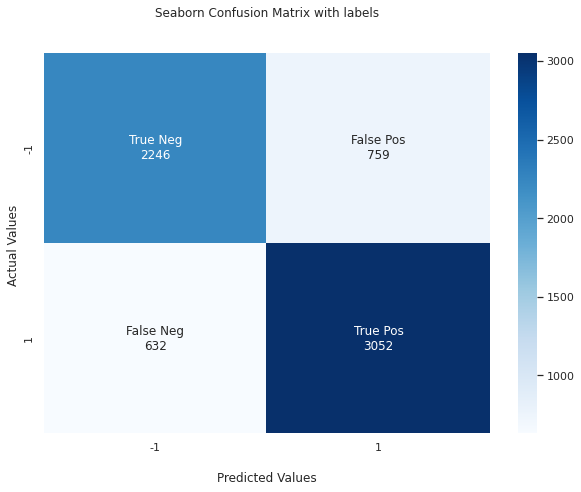

In [ ]:
#Plotting a confusion matrix using the true and predicted values of test dataset
cf_matrix_naiveb = confusion_matrix(y_testb, naiveb_test_preds)
Improved_cf_binary(cf_matrix_naiveb)

In [ ]:
#printing classification report on both the test and training dataset
print(classification_report(y_trainb,naiveb_train_preds))
print(classification_report(y_testb,naiveb_test_preds))

              precision    recall  f1-score   support

          -1       0.90      0.88      0.89     12393
           1       0.90      0.92      0.91     14362

    accuracy                           0.90     26755
   macro avg       0.90      0.90      0.90     26755
weighted avg       0.90      0.90      0.90     26755

              precision    recall  f1-score   support

          -1       0.78      0.75      0.76      3005
           1       0.80      0.83      0.81      3684

    accuracy                           0.79      6689
   macro avg       0.79      0.79      0.79      6689
weighted avg       0.79      0.79      0.79      6689



As we can see the model is doing a better job at classifying positive sentiment tweets correctly as compared to negative sentiment tweeets

In [ ]:
naiveb_evaluation_df = classification_results(y_testb,naiveb_test_preds , scoring_list)
naiveb_evaluation_df

,scoring,Value
0,accuracy_score,0.792047
1,precision_score,0.800840
2,recall_score,0.828447
3,f1_score,0.814410


### **Stochastic Gradient Descent**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variable and the independent variables
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_binary, Y_binary, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of SGDClassifier with default set of hyperparameters
sgdcB_model = SGDClassifier()

#Using pipeline to chain our multiple estimators
sgdcB_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', sgdcB_model)
                ])

#Fitting data on our final estimator
sgdcB_pipe.fit(X_trainb,y_trainb)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', SGDClassifier())])

In [ ]:
sgdcB_pipe.score(X_trainb ,y_trainb)

0.9777985423285367

In [ ]:
#Using our estimator predicting the values of our target variable on both test and training dataset
sgdcB_train_preds = sgdcB_pipe.predict(X_trainb)
sgdcB_test_preds = sgdcB_pipe.predict(X_testb)

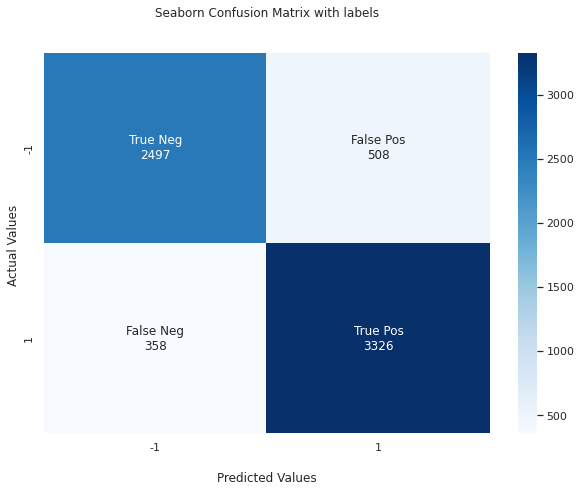

In [ ]:
#Plotting a confusion matrix using the true and predicted values of test dataset
cf_matrix_sgdcB_grid = confusion_matrix(y_testb, sgdcB_test_preds)
Improved_cf_binary(cf_matrix_sgdcB_grid)

In [ ]:
#printing classification report on both the test and training dataset
print(classification_report(y_trainb,sgdcB_train_preds))
print(classification_report(y_testb,sgdcB_test_preds))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.98     12393
           1       0.98      0.98      0.98     14362

    accuracy                           0.98     26755
   macro avg       0.98      0.98      0.98     26755
weighted avg       0.98      0.98      0.98     26755

              precision    recall  f1-score   support

          -1       0.87      0.83      0.85      3005
           1       0.87      0.90      0.88      3684

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
sgdcb_evaluation_df = classification_results(y_testb,sgdcB_test_preds, scoring_list)
sgdcb_evaluation_df

,scoring,Value
0,accuracy_score,0.870534
1,precision_score,0.867501
2,recall_score,0.902823
3,f1_score,0.884810


Stochastic Gradient Descent model is doing a really good as the number of false negatives are very less which is translating into high recall score

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variable and the independent variables
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_binary, Y_binary, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of LogisticRegression with solver as "newton-cg"
logisticB_model = LogisticRegression(solver= "newton-cg")

#Using pipeline to chain our multiple estimators
logB_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', logisticB_model)
                ])

#Fitting data on our final estimator
logB_pipe.fit(X_trainb,y_trainb)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LogisticRegression(solver='newton-cg'))])

In [ ]:
logB_pipe.score(X_trainb ,y_trainb)

0.9767146327789198

In [ ]:
#Using our estimator predicting the values of our target variable on both test and training dataset
logB_train_preds = logB_pipe.predict(X_trainb)
logB_test_preds = logB_pipe.predict(X_testb)

In [ ]:
#printing classification report on both the test and training dataset
print(classification_report(y_trainb,logB_train_preds))
print(classification_report(y_testb,logB_test_preds))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.97     12393
           1       0.98      0.98      0.98     14362

    accuracy                           0.98     26755
   macro avg       0.98      0.98      0.98     26755
weighted avg       0.98      0.98      0.98     26755

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86      3005
           1       0.88      0.89      0.89      3684

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



**Tuning the hyper parameters of our estimators so that we can amp up the accuracy and reduce overfitting**

In [ ]:
#Creating an instance of LogisticRegression 
logisticB_grid_model = LogisticRegression( )

#Using pipeline to chain our multiple estimators
logB_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', logisticB_grid_model)
                ])

In [ ]:
# HYperparameter Grid
param_dict = {'clf__C': [2.5,3,1.5],
              'clf__solver' : ["newton-cg"],
              'clf__max_iter':[50,100],
              "vec__vec1__ngram_range" : [(1,1),(1,2)],
              }

kfold = StratifiedKFold(n_splits=2)

#Using GridSearchCv to find the best set of hyperparameters for our final estimator
logB_grid_model = GridSearchCV(logB_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

logB_grid_model.fit(X_trainb, y_trainb)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vec',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vec1',
                                                                         CountVectorizer(),
                                                                         'lemmatized_tweet'),
                                                                        ('vec2',
                                                                         CountVectorizer(),
                                                                         'hashtags')])),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [2.5, 3, 1.5], 'clf__max_iter': [50, 100],
                         'clf__solver': ['newton-cg'],
                         'vec__vec1__ngram_range': [(1, 1

In [ ]:
#Checking the best set of hyperparameters that we got by using GridSearchCV
logB_grid_model.best_params_

{'clf__C': 1.5,
 'clf__max_iter': 50,
 'clf__solver': 'newton-cg',
 'vec__vec1__ngram_range': (1, 1)}

In [ ]:
logB_grid_model.score(X_trainb ,y_trainb)

0.9838161091384788

In [ ]:
##Using our estimator predicting the values of our target variable on both test and training dataset
logB_train_grid_preds = logB_grid_model.predict(X_trainb)
logB_test_grid_preds = logB_grid_model.predict(X_testb)

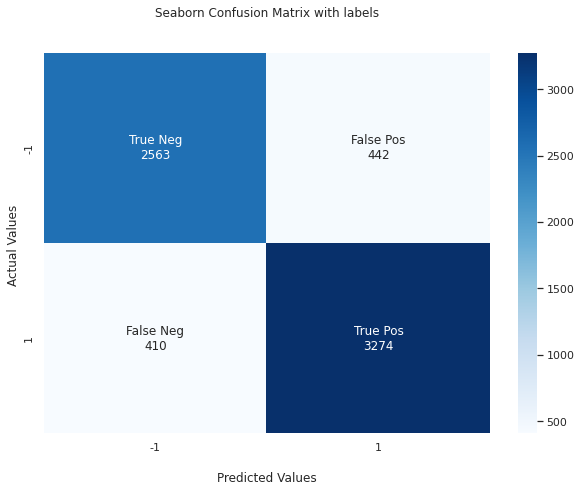

In [ ]:
#Plotting a confusion matrix using the true and predicted values of test dataset
cf_matrix_logB_grid = confusion_matrix(y_testb, logB_test_grid_preds)
Improved_cf_binary(cf_matrix_logB_grid)

The number of False Positive and False Negatives are almost similar which means the model is doing an equally good job at classifying both labels

In [ ]:
#printing classification report on both the test and training dataset
print(classification_report(y_trainb,logB_train_grid_preds))
print(classification_report(y_testb,logB_test_grid_preds))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98     12393
           1       0.98      0.99      0.98     14362

    accuracy                           0.98     26755
   macro avg       0.98      0.98      0.98     26755
weighted avg       0.98      0.98      0.98     26755

              precision    recall  f1-score   support

          -1       0.86      0.85      0.86      3005
           1       0.88      0.89      0.88      3684

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



In [ ]:
logb_evaluation_df = classification_results(y_testb,logB_test_grid_preds, scoring_list)
logb_evaluation_df

,scoring,Value
0,accuracy_score,0.872627
1,precision_score,0.881055
2,recall_score,0.888708
3,f1_score,0.884865


### **Support Vector Machine**

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting our dataset into test and training sets for the dependent variable and the independent variables
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_binary, Y_binary, test_size=0.20, random_state=42)

In [ ]:
#Creating an instance of LinearSVC
svc_bin_model = LinearSVC(penalty="l1" , dual=False)

#Using pipeline to chain multiple estimators
svc_bin_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svc_bin_model)
                ])

#Fitting our final estimator with data
svc_bin_pipe.fit(X_trainb,y_trainb)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1', CountVectorizer(),
                                                  'lemmatized_tweet'),
                                                 ('vec2', CountVectorizer(),
                                                  'hashtags')])),
                ('clf', LinearSVC(dual=False, penalty='l1'))])

In [ ]:
svc_bin_pipe.score(X_trainb ,y_trainb)

0.9948047094001121

In [ ]:
#Predicting the values of dependent variable "sentiment" for both our training and test dataset
svcB_train_preds = svc_bin_pipe.predict(X_trainb)
svcB_test_preds = svc_bin_pipe.predict(X_testb)

In [ ]:
#Printing classification report for our training and test dataset
print(classification_report(y_trainb,svcB_train_preds))
print(classification_report(y_testb,svcB_test_preds))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99     12393
           1       0.99      1.00      1.00     14362

    accuracy                           0.99     26755
   macro avg       0.99      0.99      0.99     26755
weighted avg       0.99      0.99      0.99     26755

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86      3005
           1       0.88      0.89      0.88      3684

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



**Fine tuning the hyperparameters for better accuracy**

In [ ]:
#Creating an instance of LinearSVC
svcb_grid_model = LinearSVC( )

#Using the pipeline to chain multiple estimators
svcb_grid_pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', svcb_grid_model)
                ])


In [ ]:
# HYperparameter Grid
param_dict = {
    "clf__dual" : [False],
    "clf__penalty" :  ["l1"],
    "clf__C" : [0.4,0.55,0.75,1,1.2],
}

kfold = StratifiedKFold(n_splits=2)


# With the help of GridSearchCV finding the best set of hyperparameters for our estimators
svcb_grid_model = GridSearchCV(svcb_grid_pipe , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

svcb_grid_model.fit(X_trainb, y_trainb)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vec',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('vec1',
                                                                         CountVectorizer(),
                                                                         'lemmatized_tweet'),
                                                                        ('vec2',
                                                                         CountVectorizer(),
                                                                         'hashtags')])),
                                       ('clf', LinearSVC())]),
             param_grid={'clf__C': [0.4, 0.55, 0.75, 1, 1.2],
                         'clf__dual': [False], 'clf__penalty': ['l1']},
             return_train_score=True, verbose=1)

In [ ]:
#Checking the best combination of hyperparameters that we got back from GridSearchCV
svcb_grid_model.best_params_

{'clf__C': 0.4, 'clf__dual': False, 'clf__penalty': 'l1'}

In [ ]:
svcb_grid_model.score(X_trainb ,y_trainb)

0.959185199028219

In [ ]:
#Predicting the values of dependent variable "Sentiment" for our training and test dataset
svcb_train_grid_preds = svcb_grid_model.predict(X_trainb)
svcb_test_grid_preds = svcb_grid_model.predict(X_testb)

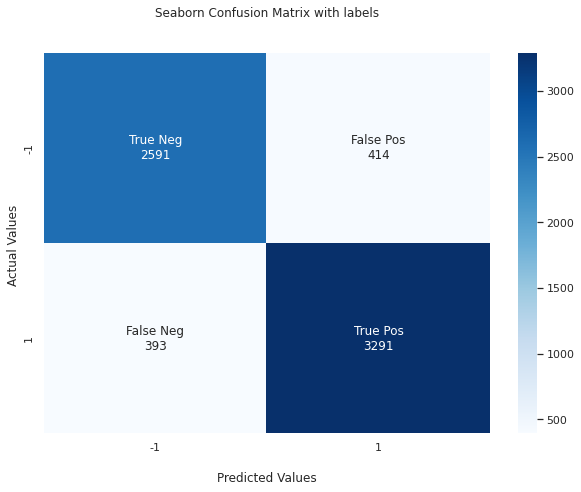

In [ ]:
#Plotting a confusion matrix using the true and predicted values of test dataset
cf_matrix_svcb_grid = confusion_matrix(y_testb, svcb_test_grid_preds)
Improved_cf_binary(cf_matrix_svcb_grid)

In [ ]:
#Printing the classificaton reports 
print(classification_report(y_trainb,svcb_train_grid_preds))
print(classification_report(y_testb,svcb_test_grid_preds))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96     12393
           1       0.96      0.96      0.96     14362

    accuracy                           0.96     26755
   macro avg       0.96      0.96      0.96     26755
weighted avg       0.96      0.96      0.96     26755

              precision    recall  f1-score   support

          -1       0.87      0.86      0.87      3005
           1       0.89      0.89      0.89      3684

    accuracy                           0.88      6689
   macro avg       0.88      0.88      0.88      6689
weighted avg       0.88      0.88      0.88      6689



In [ ]:
#Calculating the accuracy of our prediction made on test data
svcb_evaluation_df = classification_results(y_testb,svcb_test_grid_preds, scoring_list)
svcb_evaluation_df

,scoring,Value
0,accuracy_score,0.879354
1,precision_score,0.888259
2,recall_score,0.893322
3,f1_score,0.890784


### **Feature Importance plot**

In [ ]:
featureb_names = svcb_grid_model.best_estimator_.named_steps["vec"].get_feature_names_out()
coefs_b = svcb_grid_model.best_estimator_.named_steps["clf"].coef_.flatten()

# Zip coefficients and names together and make a DataFrame
zipped_b = zip(featureb_names, coefs_b)
df_b = pd.DataFrame(zipped_b, columns=["feature", "value"])
df_b["feature"] = df_b["feature"].apply(lambda x : re.sub('vec1__|vec2__','',x))
# Sort the features by the absolute value of their coefficient
df_b["abs_value"] = df_b["value"].apply(lambda x: abs(x))
df_b["colors"] = df_b["value"].apply(lambda x: "green" if x > 0 else "red")
df_b = df_b.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

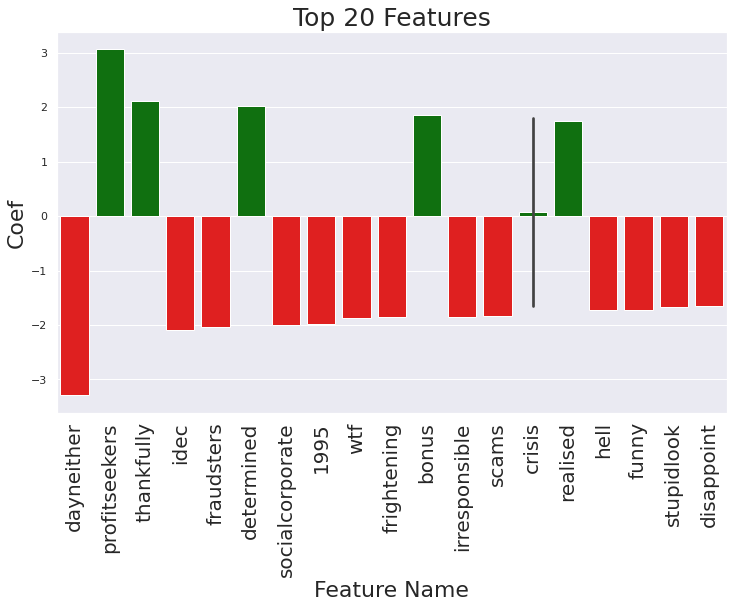

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df_b.head(20),
           palette=df_b.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

We can notice that negative unigrams are more effective for this binary classification . 

### **Roc auc curve and precision recall curve for the best performing model**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

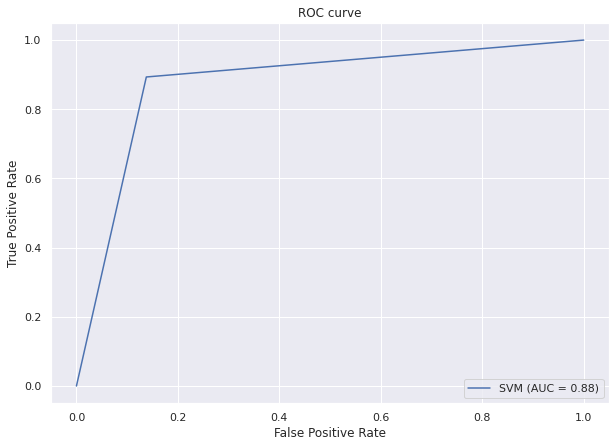

In [ ]:
fpr, tpr, thresholds = roc_curve(y_testb, svcb_test_grid_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='SVM')
display.plot() 
plt.title("ROC curve")
plt.show()

Our Roc curve have curves which are more closer to the top left corner indicating a good performance by the model as TPR is quite high for low values of FPR


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

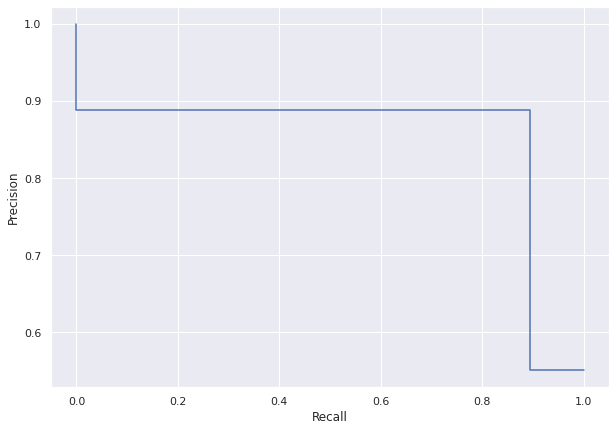

In [ ]:
precision, recall, _ = precision_recall_curve(y_testb, svcb_test_grid_preds)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

### **Comparing all the binary models evaluated till now**

In [ ]:
#Creating a list of all the evaluation df created till now for different models
evaluation_df = [ naiveb_evaluation_df , logb_evaluation_df , sgdcb_evaluation_df , svcb_evaluation_df ]

#Creating a list of all the model names that we have evaluated till now
model_names = ["Naive Bayes" , "Logistic Regression" ,  "Stochastic Gradient Descent" , "Support Vector Machine"]

binary_evaluation_df = evaluate_all_models(evaluation_df , model_names)
binary_evaluation_df

,Model_Name,accuracy_score,precision_score,recall_score,f1_score
0,Naive Bayes,0.792047,0.800840,0.828447,0.814410
1,Logistic Regression,0.872627,0.881055,0.888708,0.884865
2,Stochastic Gradient Descent,0.870534,0.867501,0.902823,0.884810
3,Support Vector Machine,0.879354,0.888259,0.893322,0.890784


Overall Support Vector Machine is our best performing model but the recall score of Stochastic Gradient Descent is slightly higher than the recall score of Support Vector Machine model

## **Conclusion**

So with this we are done with our tweet sentiment analysis project .At first  we looked for the count of unique values we had for the different columns in our dataset like number of unique UserName , ScreenName and locations in our record to better understand the data . Then we cleaning and pre processed our tweets through different techniques and libraries to remove all characters which don't matter to us for sentiment analysis

In the eda section we analyzed our tweets in deep on the basis of number of words, urls, mentions and hashtags also we tried to understand the relation between tweet count and the month using lineplots

We used CountVectorizer which uses bag of words method to convert our tweets into a matrix of token counts . In the model implementation part we did two types of classification multinomial and binary(positive and negative). For both types of classification our best performing model was Linear Support Vector classifier

